In [116]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pypalettes import load_cmap
from highlight_text import fig_text, ax_text
from pyfonts import load_font

df = gpd.read_file("atlas_sp_hdi.geojson")
data = {
    'HDI': df['HDI'],
    'pop': df['pop']
}
atlas = pd.DataFrame(data)

bins = [0.0, 0.65, 0.699, 0.749, 0.799, 0.849, 0.899, 0.949, 1.0]
labels = [
    "0.650 or less", 
    "0.650 to 0.699", 
    "0.700 to 0.749", 
    "0.750 to 0.799", 
    "0.800 to 0.849", 
    "0.850 to 0.899", 
    "0.900 to 0.949", 
    "0.950 or more"
]

atlas['group_hdi'] = pd.cut(atlas['HDI'], bins=bins, include_lowest=True, labels=labels)

pop_hdi = atlas.groupby('group_hdi', observed=True)['pop'].sum().reset_index()
pop_hdi['share'] = (pop_hdi['pop'] / pop_hdi['pop'].sum()) * 100

pop_hdi['y_text'] = pop_hdi['share'] / 2
pop_hdi['label'] = pop_hdi['share'].round(1).astype(str) + "%"
df.head()
pop_hdi

,group_hdi,pop,share,y_text,label
0,0.650 or less,415953.0,3.710661,1.855331,3.7%
1,0.650 to 0.699,1620623.0,14.457362,7.228681,14.5%
2,0.700 to 0.749,2106520.0,18.791984,9.395992,18.8%
3,0.750 to 0.799,2460948.0,21.953789,10.976895,22.0%
4,0.800 to 0.849,1576054.0,14.059768,7.029884,14.1%
5,0.850 to 0.899,1417249.0,12.643090,6.321545,12.6%
6,0.900 to 0.949,1409668.0,12.575460,6.287730,12.6%
7,0.950 or more,202658.0,1.807885,0.903943,1.8%


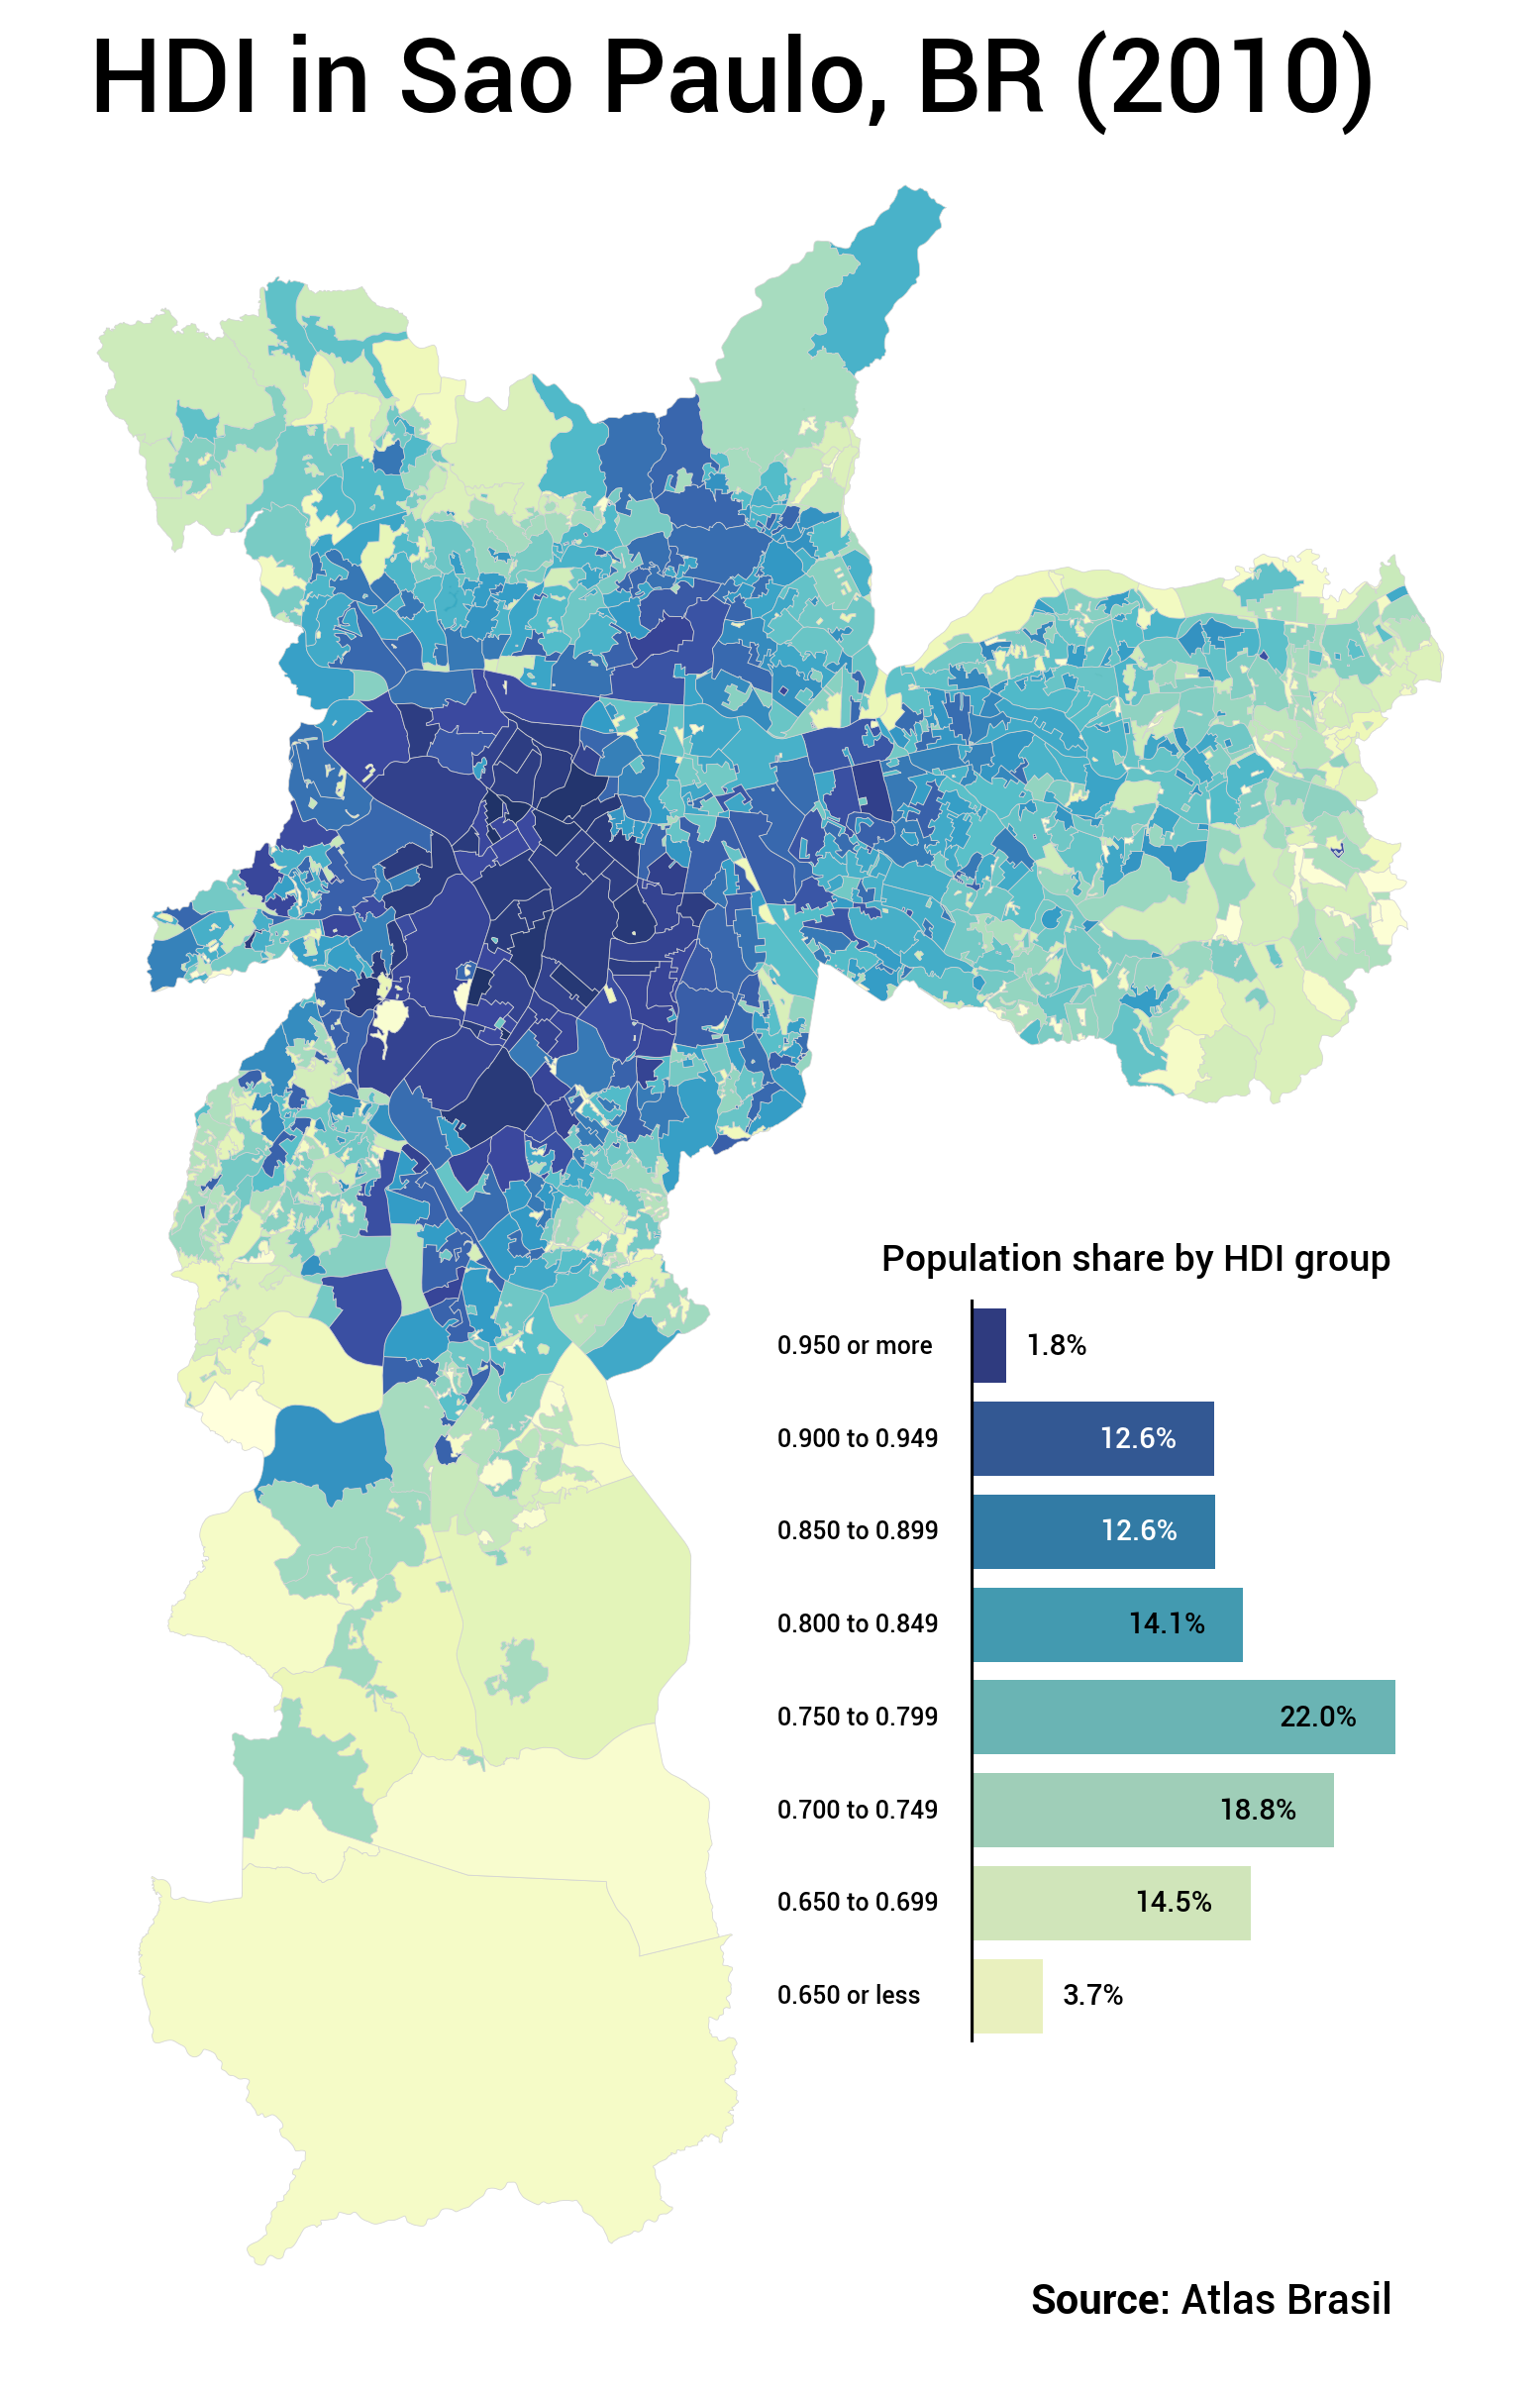

In [122]:
palette_name = "YlGnBu"
cmap = load_cmap(palette_name, cmap_type='continuous')
font = load_font("https://github.com/akella/wb/blob/master/css/fonts/Roboto-Medium.otf?raw=true")
boldfont = load_font("https://github.com/akella/wb/blob/master/css/fonts/Roboto-Bold.otf?raw=true")

fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
ax.axis('off')

df.plot(ax=ax, column='HDI', cmap=cmap, edgecolor='lightgrey', linewidth=0.2, alpha=0.9)

subax = ax.inset_axes(
    bounds=(0.58, 0.22, 0.15, 0.25),
    transform=fig.transFigure
)
subax.set_axis_off()
sns.barplot(data=pop_hdi, x='share', y='group_hdi', palette=palette_name, ax=subax, hue='group_hdi', legend=False)
subax.axvline(x=0, color='black')
subax.invert_yaxis()

for index, row in pop_hdi.iterrows():
    x_pos = row['share'] - 6 if row['share'] > 4 else row['share'] + 1
    y_pos = index
    color = 'white' if index in [5, 6] else 'black'
    subax.text(
        x_pos,
        y_pos,
        row['label'], 
        color=color,
        size=7,
        va='center',
        font=font
    )
    subax.text(
        - 10,
        y_pos,
        row['group_hdi'], 
        color='black', 
        size=6,
        va='center',
        font=font
    )

fig.text(
    x=0.5, y=0.87, s="HDI in Sao Paulo, BR (2010)", ha="center", size=25, font=font
)
fig.text(
    x=0.55, y=0.48, s="Population share by HDI group", size=9, font=font
)
fig_text(
    x=0.6, y=0.14, s="<Source>: Atlas Brasil", size=10, font=font, highlight_textprops=[{'font': boldfont}]
)

plt.savefig('brazil', bbox_inches='tight', dpi=300)
plt.show()

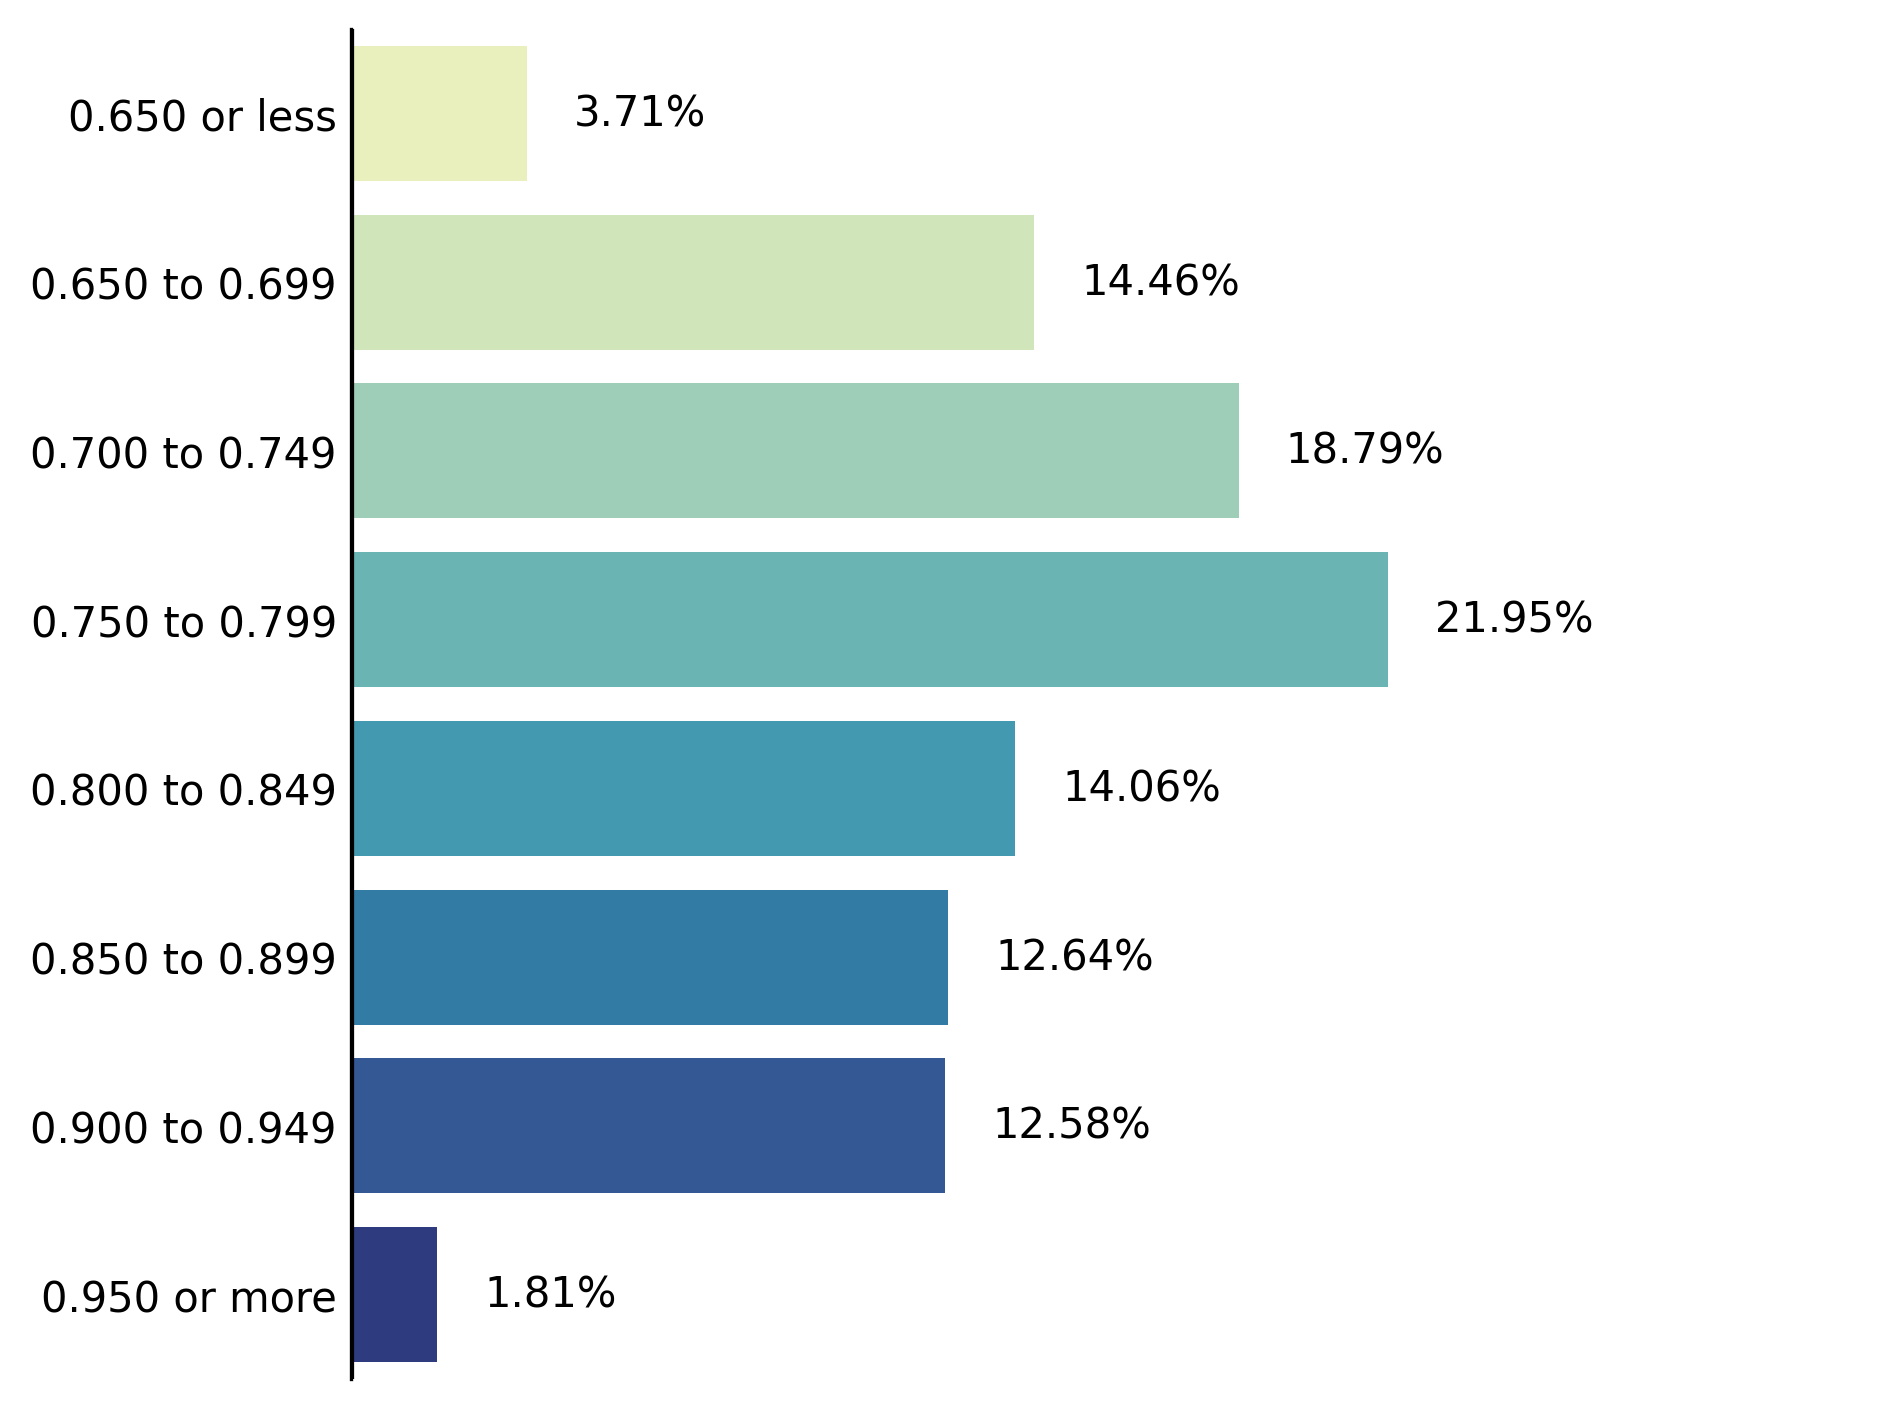

In [49]:


fig, ax = plt.subplots(dpi=300)
sns.barplot(data=pop_hdi, x='share', y='group_hdi', palette='YlGnBu', ax=subax, hue='group_hdi', legend=False)

subax.axvline(x=0, color='black')

for index, row in pop_hdi.iterrows():
    subax.text(row['share'] + 1, index, row['label'], 
            color='black', 
            size=10, va='center')

subax.set_xlabel('')
subax.set_ylabel('')
subax.set_xlim(0, pop_hdi['share'].max() + 10)
subax.spines[['right', 'top', 'bottom']].set_visible(False)
subax.tick_params(length=0)
subax.get_xaxis().set_ticks([])

plt.tight_layout()
plt.show()
